Train score is: 0.7078625816106698
Test score is: 0.7132614129719774


              precision    recall  f1-score   support

           0       0.71      0.77      0.74      8035
           1       0.71      0.65      0.68      7167

    accuracy                           0.71     15202
   macro avg       0.71      0.71      0.71     15202
weighted avg       0.71      0.71      0.71     15202

[[6162 1873]
 [2486 4681]]


Train score is: 0.8402322101073889
Test score is: 0.8477831864228391


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      8035
           1       0.85      0.83      0.84      7167

    accuracy                           0.85     15202
   macro avg       0.85      0.85      0.85     15202
weighted avg       0.85      0.85      0.85     15202

[[6965 1070]
 [1244 5923]]




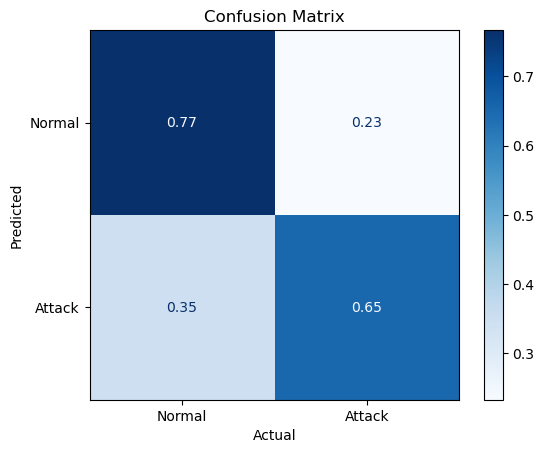

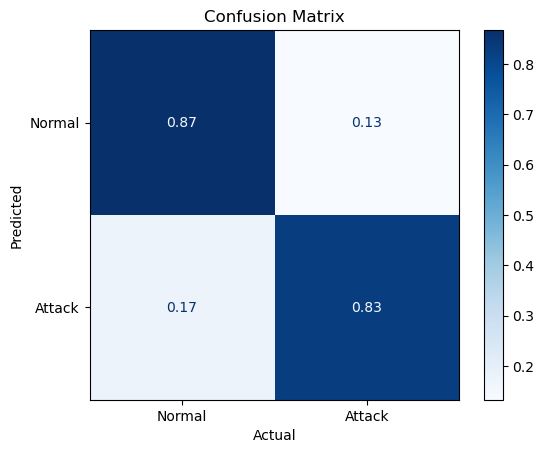

In [4]:
#Importing the necessary modules
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import numpy as numpy
import pandas as pd , scipy, numpy as np 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split,KFold
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report,accuracy_score
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')


#Loading the dataset

df=pd.read_csv('dataset_sdn.csv')
df.head()

#Data Pre-processing

to_drop = ['dt']
df = df.drop(to_drop, axis='columns')
df = df[df['pktrate'] !=0]

df['src'] = [int(i.split('.')[3]) for i in df['src']]#extracting the last two digits 
df['dst'] = [int(i.split('.')[3])for i in df['dst']]#extracting the last two digits
df['switch'] = df['switch'].astype(str) 
df['src'] = df['src'].astype(str)
df['dst'] = df['dst'].astype(str)
df['port_no'] = df['port_no'].astype(str)
df['Protocol'] = df['Protocol'].astype(str)


new_df = pd.get_dummies(df,columns = ['switch','src','Protocol','dst','port_no'])
new_df


df.isnull().sum()


new_df.fillna(new_df.mean(), inplace=True)


x=new_df.drop(['label'],axis=1)
y=new_df.label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
new_df


from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)


def show_confusion_matrix(model,data,label,pred_label):
  class_names=['Normal','Attack']

  print(plot_confusion_matrix(model, data,label,display_labels=class_names,cmap=plt.cm.Blues,normalize='true'))
  plt.title('Confusion Matrix')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  print('\n')
  print(classification_report(label, pred_label))
  print(confusion_matrix(label,pred_label))
  print('\n')


from sklearn.naive_bayes import GaussianNB

#Gaussian Naive Bayes 
gnb = GaussianNB()
gnb.fit(x_train, y_train.values.ravel())
y_test_pred_gnb = gnb.predict(x_test)


print("Train score is:", gnb.score(x_train, y_train))
print("Test score is:", gnb.score(x_test, y_test))


show_confusion_matrix(gnb,x_test,y_test,y_test_pred_gnb)

#Logistic Regression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(x_train, y_train) 
y_pred_lr = lr.predict(x_test)


print("Train score is:", lr.score(x_train, y_train))
print("Test score is:", lr.score(x_test, y_test))


show_confusion_matrix(lr,x_test,y_test,y_pred_lr)

GradientBoostingClassifier()

Train score is: 0.9968918052197938
Test score is: 0.996710959084331


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8035
           1       1.00      1.00      1.00      7167

    accuracy                           1.00     15202
   macro avg       1.00      1.00      1.00     15202
weighted avg       1.00      1.00      1.00     15202

[[8006   29]
 [  21 7146]]




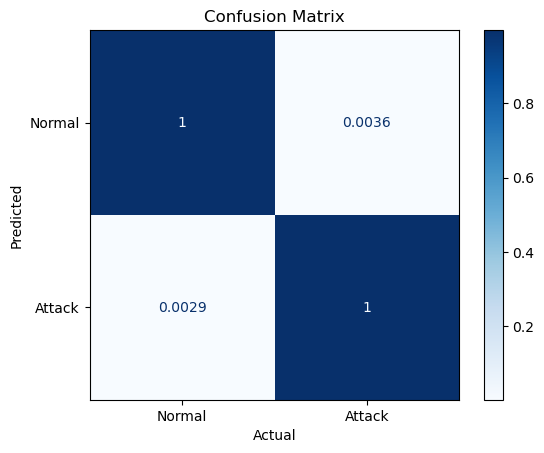

In [5]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier 
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)


y_pred_gbc = gbc.predict(x_test)


print("Train score is:", gbc.score(x_train, y_train))
print("Test score is:", gbc.score(x_test, y_test))


show_confusion_matrix(gbc,x_test,y_test,y_pred_gbc)

In [6]:
#Decision Tree 

from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import GridSearchCV
folds = KFold(n_splits = 2, shuffle = True, random_state = 10)

hyper_params = [ {'criterion' : ['gini', 'entropy'],
                     'max_depth': [None,1,2,3,4,5]}]


# specify model
model = DecisionTreeClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=10, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='accuracy', verbose=1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.230759,8.441210e-04,0.008976,2.384186e-07,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.999638,1.000000,0.999819,0.000181,2,1.000000,1.000000,1.000000,0.000000
1,0.062340,5.166531e-04,0.008250,3.008842e-04,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.741021,0.736704,0.738862,0.002159,11,0.736704,0.741021,0.738862,0.002159
2,0.085328,2.014637e-03,0.007493,4.844666e-04,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.866300,0.866493,0.866397,0.000096,9,0.866559,0.866300,0.866430,0.000129
3,0.119737,3.447175e-03,0.011470,1.494884e-03,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.885936,0.881755,0.883846,0.002090,7,0.885077,0.887087,0.886082,0.001005
4,0.145255,2.237022e-02,0.008969,2.264977e-06,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.927575,0.925369,0.926472,0.001103,6,0.925139,0.928167,0.926653,0.001514
5,0.139997,7.697344e-04,0.009475,4.987717e-04,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.956453,0.955136,0.955795,0.000659,4,0.955925,0.955762,0.955844,0.000082
6,0.171143,1.571298e-03,0.008975,9.536743e-07,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.999934,1.000000,0.999967,0.000033,1,1.000000,1.000000,1.000000,0.000000
7,0.065826,3.397465e-05,0.009762,1.217365e-03,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.741021,0.736704,0.738862,0.002159,11,0.736704,0.741021,0.738862,0.002159
8,0.093564,2.152920e-04,0.009777,1.955032e-04,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.851697,0.848304,0.850001,0.001696,10,0.848304,0.851697,0.850001,0.001696
9,0.116299,2.990723e-03,0.008993,2.300739e-05,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.875181,0.870572,0.872876,0.002304,8,0.870572,0.875181,0.872876,0.002304


In [7]:

# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))




dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
# use the model to make predictions with the test data
y_pred_dt= dtree.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != y_pred_dt).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_dt)
print('Accuracy: {:.2f}'.format(accuracy))



print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))


x.columns

The best test score is 0.9999671095908433 corresponding to hyperparameters {'criterion': 'entropy', 'max_depth': None}


DecisionTreeClassifier()

Misclassified samples: 0
Accuracy: 1.00
[[8035    0]
 [   0 7167]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8035
           1       1.00      1.00      1.00      7167

    accuracy                           1.00     15202
   macro avg       1.00      1.00      1.00     15202
weighted avg       1.00      1.00      1.00     15202



Index(['pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
       'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow',
       'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'switch_1',
       'switch_10', 'switch_2', 'switch_3', 'switch_4', 'switch_5', 'switch_6',
       'switch_7', 'switch_8', 'switch_9', 'src_1', 'src_10', 'src_11',
       'src_12', 'src_13', 'src_14', 'src_15', 'src_16', 'src_17', 'src_18',
       'src_2', 'src_20', 'src_3', 'src_4', 'src_5', 'src_6', 'src_7', 'src_8',
       'src_9', 'Protocol_ICMP', 'Protocol_TCP', 'Protocol_UDP', 'dst_1',
       'dst_10', 'dst_11', 'dst_12', 'dst_13', 'dst_14', 'dst_15', 'dst_16',
       'dst_17', 'dst_18', 'dst_2', 'dst_3', 'dst_4', 'dst_5', 'dst_6',
       'dst_7', 'dst_8', 'dst_9', 'port_no_1', 'port_no_2', 'port_no_3',
       'port_no_4', 'port_no_5'],
      dtype='object')

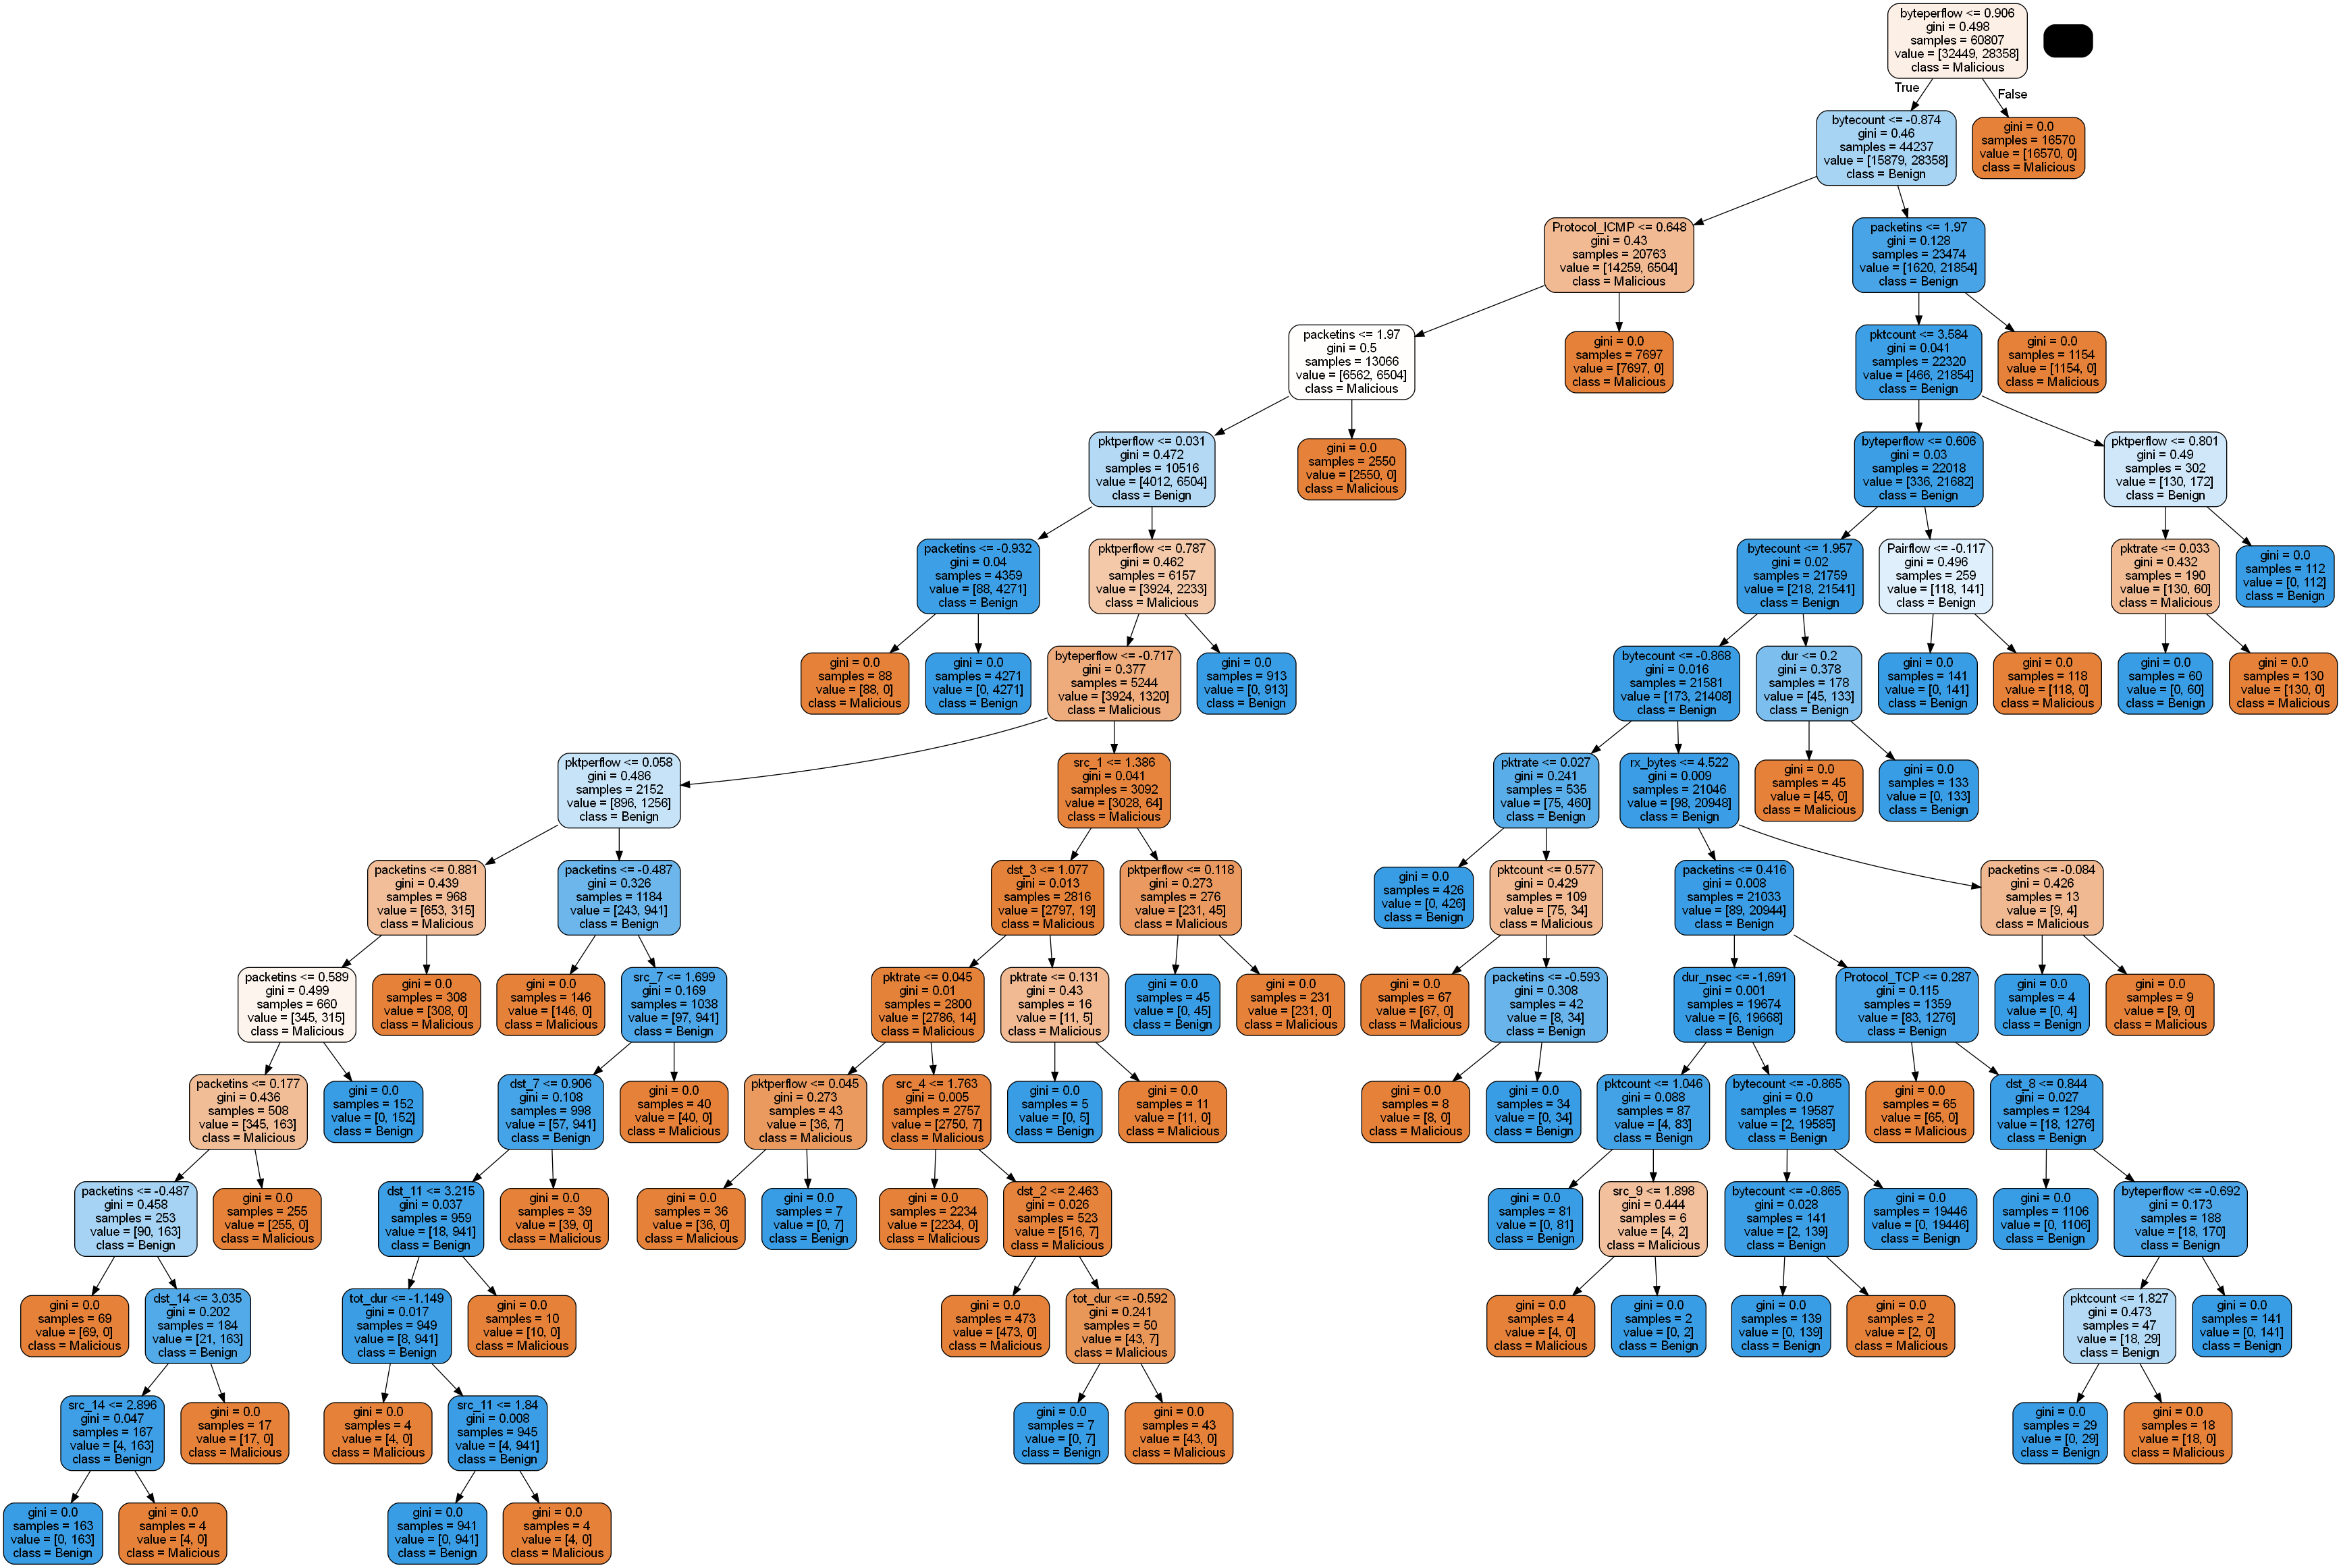

In [8]:
from sklearn import tree


from IPython.display import Image, display
import matplotlib.pyplot as plt, pydotplus
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=['pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
       'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow',
       'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'switch_1',
       'switch_10', 'switch_2', 'switch_3', 'switch_4', 'switch_5', 'switch_6',
       'switch_7', 'switch_8', 'switch_9', 'src_1', 'src_10', 'src_11',
       'src_12', 'src_13', 'src_14', 'src_15', 'src_16', 'src_17', 'src_18',
       'src_2', 'src_20', 'src_3', 'src_4', 'src_5', 'src_6', 'src_7', 'src_8',
       'src_9', 'Protocol_ICMP', 'Protocol_TCP', 'Protocol_UDP', 'dst_1',
       'dst_10', 'dst_11', 'dst_12', 'dst_13', 'dst_14', 'dst_15', 'dst_16',
       'dst_17', 'dst_18', 'dst_2', 'dst_3', 'dst_4', 'dst_5', 'dst_6',
       'dst_7', 'dst_8', 'dst_9', 'port_no_1', 'port_no_2', 'port_no_3',
       'port_no_4', 'port_no_5'],  
                                class_names=['Malicious','Benign'])
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

SVC(gamma='auto')

Train score is: 0.9786373279392175
Test score is: 0.9762531245888699


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8035
           1       0.98      0.97      0.97      7167

    accuracy                           0.98     15202
   macro avg       0.98      0.98      0.98     15202
weighted avg       0.98      0.98      0.98     15202

[[7864  171]
 [ 190 6977]]




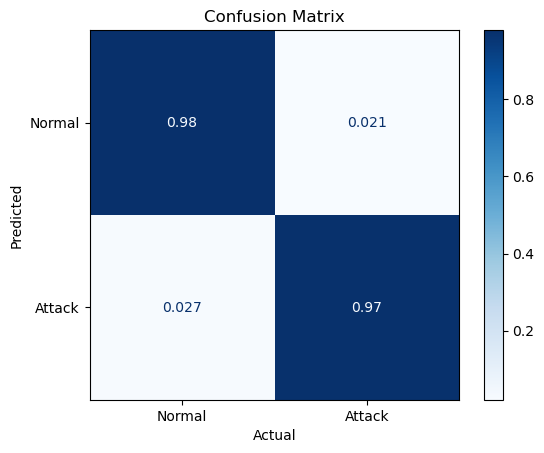

In [9]:
#Support Vector Machine
svc = SVC(gamma='auto')
svc.fit(x_train, y_train) 
y_pred_svc = svc.predict(x_test)


print("Train score is:", svc.score(x_train, y_train))
print("Test score is:", svc.score(x_test, y_test))


show_confusion_matrix(svc,x_test,y_test,y_pred_svc)

In [10]:
#Artificial Neural Network
from keras.layers import Dense, LSTM, RNN, GRU, Input
from keras.models import Model
from keras.callbacks import ModelCheckpoint

dense_1 = Dense(25,activation = 'tanh')
dense_2 = Dense(8,activation = 'selu')
dense_3 = Dense(25,activation = 'tanh')

inputs = Input(shape = (71,))
dense_x1 = dense_1(inputs)
dense_x2 = dense_2(dense_x1)
dense_x3 = dense_3(dense_x2)
outputs = Dense(1,activation = 'linear',name = 'reconstruction')(dense_x3)

model_ann = Model(inputs = inputs,outputs = outputs)

filepath = "best_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', 
                             verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model_ann.compile(optimizer = 'adam',loss = 'mse',metrics = ['accuracy'])
model_ann.summary()

history = model_ann.fit(x_train,y_train,epochs = 50,batch_size = 400,callbacks = callbacks_list,validation_data=(x_test, y_test),verbose=1)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 71)]              0         
                                                                 
 dense (Dense)               (None, 25)                1800      
                                                                 
 dense_1 (Dense)             (None, 8)                 208       
                                                                 
 dense_2 (Dense)             (None, 25)                225       
                                                                 
 reconstruction (Dense)      (None, 1)                 26        
                                                                 
Total params: 2,259
Trainable params: 2,259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
141/153 [==========================>...] - ETA: 

Epoch 24/50
145/153 [===========================>..] - ETA: 0s - loss: 0.0107 - accuracy: 0.9887
Epoch 24: val_accuracy did not improve from 0.98829
153/153 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9886 - val_loss: 0.0110 - val_accuracy: 0.9882
Epoch 25/50
148/153 [============================>.] - ETA: 0s - loss: 0.0104 - accuracy: 0.9889
Epoch 25: val_accuracy improved from 0.98829 to 0.98849, saving model to best_weights.hdf5
153/153 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9889 - val_loss: 0.0107 - val_accuracy: 0.9885
Epoch 26/50
146/153 [===========================>..] - ETA: 0s - loss: 0.0102 - accuracy: 0.9890
Epoch 26: val_accuracy improved from 0.98849 to 0.98921, saving model to best_weights.hdf5
153/153 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 0.9890 - val_loss: 0.0107 - val_accuracy: 0.9892
Epoch 27/50
149/153 [============================>.] - ETA: 0s - loss: 0.0099 - ac

In [11]:
model_ann.evaluate(x_test,y_test)

476/476 [==============================] - 1s 1ms/step - loss: 0.0070 - accuracy: 0.9917


[0.007030814420431852, 0.9917116165161133]

In [12]:
predict = model_ann.predict(x_test)
predict= np.round(predict)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))


476/476 [==============================] - 1s 1ms/step
[[7996   39]
 [  87 7080]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8035
           1       0.99      0.99      0.99      7167

    accuracy                           0.99     15202
   macro avg       0.99      0.99      0.99     15202
weighted avg       0.99      0.99      0.99     15202



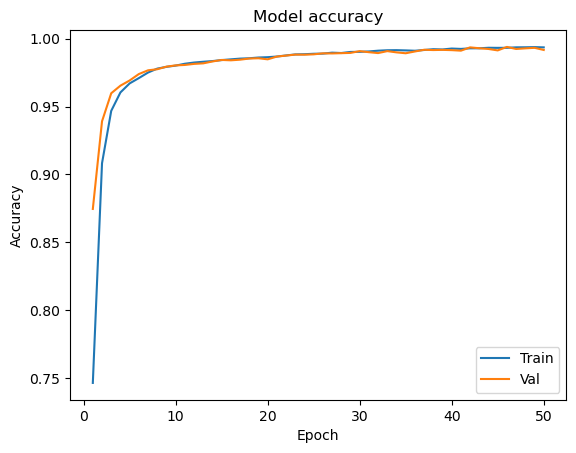

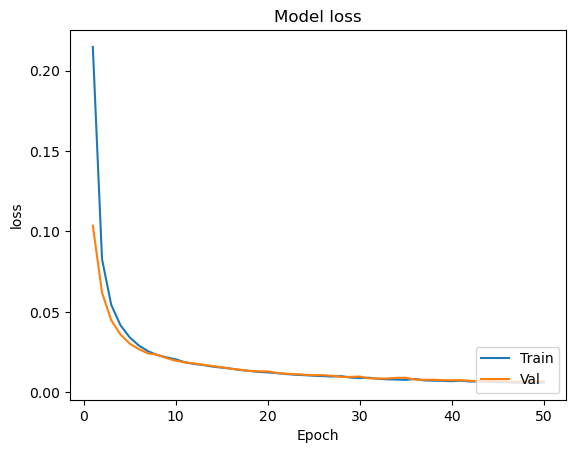

In [13]:
epochs=50
def plot_learningCurve(history,epochs):
    #Plot training and validation accuracy values
    epochs_range=range(1,epochs+1)
    plt.plot(epochs_range,history.history['accuracy'])
    plt.plot(epochs_range,history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
    #Plot training and validation loss values
    plt.plot(epochs_range,history.history['loss'])
    plt.plot(epochs_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
plot_learningCurve(history,epochs)

In [14]:
#LSTM
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation

x_train=x_train.reshape(60807, 71, 1)
x_test=x_test.reshape(15202, 71, 1)

print('Build model...')
model = Sequential()
model.add(LSTM(80, return_sequences=False, input_shape=(71,1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history=model.fit(x_train, y_train, epochs = 20, batch_size=64,validation_data=(x_test, y_test),verbose=1)


Build model...
Epoch 1/20
951/951 [==============================] - 49s 50ms/step - loss: 0.5392 - acc: 0.7171 - val_loss: 0.5630 - val_acc: 0.7431
Epoch 2/20
951/951 [==============================] - 47s 50ms/step - loss: 0.3545 - acc: 0.8585 - val_loss: 0.2739 - val_acc: 0.8940
Epoch 3/20
951/951 [==============================] - 47s 50ms/step - loss: 0.3700 - acc: 0.8225 - val_loss: 0.5985 - val_acc: 0.6300
Epoch 4/20
951/951 [==============================] - 48s 50ms/step - loss: 0.5453 - acc: 0.6951 - val_loss: 0.3845 - val_acc: 0.8569
Epoch 5/20
951/951 [==============================] - 48s 51ms/step - loss: 0.4711 - acc: 0.7814 - val_loss: 0.5306 - val_acc: 0.7186
Epoch 6/20
951/951 [==============================] - 49s 51ms/step - loss: 0.4371 - acc: 0.7928 - val_loss: 0.3238 - val_acc: 0.8696
Epoch 7/20
951/951 [==============================] - 48s 50ms/step - loss: 0.2894 - acc: 0.8837 - val_loss: 0.2620 - val_acc: 0.8961
Epoch 8/20
951/951 [===========================

In [15]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

476/476 [==============================] - 6s 13ms/step - loss: 0.1186 - acc: 0.9617
Accuracy: 96.17%


In [16]:
y_pred = model.predict(x_test)
predict= np.round(y_pred)
confusion_matrix(y_test,predict)
print('\n')
print(classification_report(y_test,predict))

476/476 [==============================] - 7s 13ms/step


array([[7594,  441],
       [ 141, 7026]], dtype=int64)



              precision    recall  f1-score   support

           0       0.98      0.95      0.96      8035
           1       0.94      0.98      0.96      7167

    accuracy                           0.96     15202
   macro avg       0.96      0.96      0.96     15202
weighted avg       0.96      0.96      0.96     15202



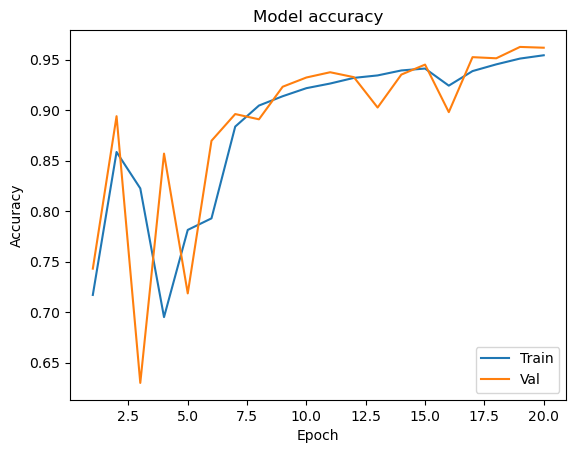

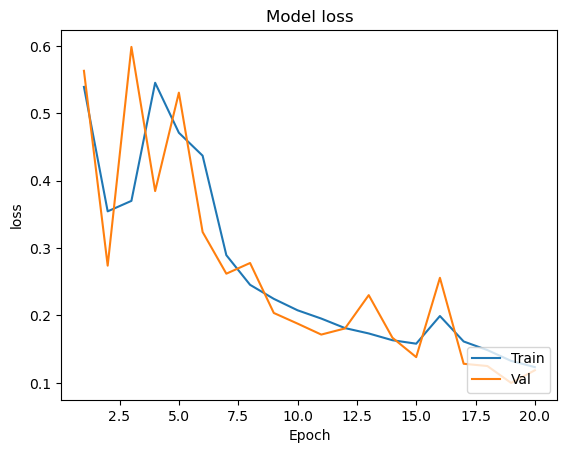

In [17]:
epochs=20
def plot_learningCurve(history,epochs):
    #Plot training and validation accuracy values
    epochs_range=range(1,epochs+1)
    plt.plot(epochs_range,history.history['acc'])
    plt.plot(epochs_range,history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
    #Plot training and validation loss values
    plt.plot(epochs_range,history.history['loss'])
    plt.plot(epochs_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
plot_learningCurve(history,epochs)

SVC(kernel='linear')

RandomForestClassifier(random_state=42)

Accuracy: 99.12%
Precision: 99.13%
Recall: 99.12%
F1 score: 99.10%
Test score: 99.12%
Train score: 100.00%


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       105
         1.0       1.00      0.89      0.94         9

    accuracy                           0.99       114
   macro avg       1.00      0.94      0.97       114
weighted avg       0.99      0.99      0.99       114

[[105   0]
 [  1   8]]




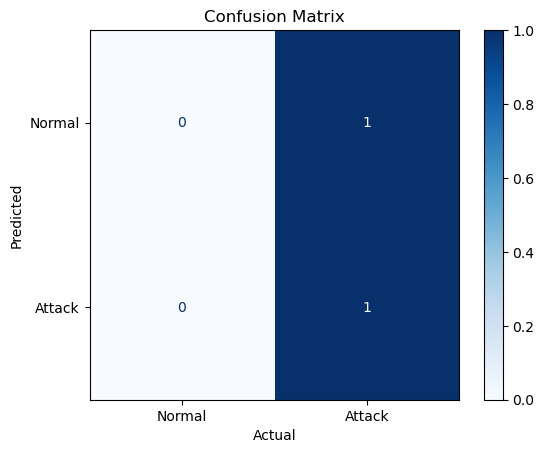

In [18]:
#Hybrid Algorithm(SVC-RF)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

# load the dataset
data = pd.read_csv("dataset_sdn.csv")
data  = data.dropna()
data = data.head(380)

# perform one-hot encoding on the Protocol, src, and dst columns
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [2, 3, 15])], remainder='passthrough')
data = ct.fit_transform(data)

# split the dataset into training and testing sets
X = data[:, :-1]
y = data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# use SVM for feature selection
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
important_features = svm.coef_

# select the features
feature_importance = pd.Series(data=important_features[0], index=range(X_train.shape[1]))
selected_features = feature_importance.abs().nlargest(24).index.tolist()

X_train_new = X_train[:, selected_features]
X_test_new = X_test[:, selected_features]

# use Random Forest on the features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_new, y_train)
y_pred_hybrid = rf.predict(X_test_new)


# evaluate the model
accuracy = accuracy_score(y_test, y_pred_hybrid)
print("Accuracy: {:.2f}%".format(accuracy * 100))

from sklearn.metrics import precision_score, recall_score, f1_score

# calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_hybrid, average='weighted')
recall = recall_score(y_test, y_pred_hybrid, average='weighted')
f1 = f1_score(y_test, y_pred_hybrid, average='weighted')

# calculate test score and train score
test_score = rf.score(X_test_new, y_test)
train_score = rf.score(X_train_new, y_train)

# print the results
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))
print("Test score: {:.2f}%".format(test_score * 100))
print("Train score: {:.2f}%".format(train_score*100))

show_confusion_matrix(rf,X_test,y_test,y_pred_hybrid)

In [19]:
#Analysis Table
from tabulate import tabulate 
print('N:Normal ')
print('A:Attack')
headers = ('Algo ','Acc','N Prec','A Prec','N Rec','A Rec','N F-score','A F-score','FPR','FNR')
data1 = ['GNB',0.70,0.70,0.70,0.76,0.64,0.73,0.67,0.24,0.36]
data2 = ['LR',0.84,0.84,0.84,0.86,0.82,0.85,0.83,0.14,0.18]
data3 = ['SVC',0.95,0.98,0.97,0.98,0.98,0.98,0.97,0.023,0.024]
data4 = ['Ensemble',0.97,0.99,0.99,0.99,0.99,0.99,0.99,0.001,0.001]
data5 = ['ANN',0.98,0.99,0.99,0.99,0.99,0.99,0.99,0.001,0.001]
data6 = ['DL',0.98,0.99,0.99,0.99,0.99,0.99,0.99,0.001,0.001]
data7 = ['Hybrid',0.99,0.99,1.0,1.0,0.89,1.0,0.94,1.0,0]

data = [data1, data2, data3, data4, data5,data6,data7]
print(tabulate(data, headers=headers, tablefmt='grid'))

N:Normal 
A:Attack
+----------+-------+----------+----------+---------+---------+-------------+-------------+-------+-------+
| Algo     |   Acc |   N Prec |   A Prec |   N Rec |   A Rec |   N F-score |   A F-score |   FPR |   FNR |
+==========+=======+==========+==========+=========+=========+=============+=============+=======+=======+
| GNB      |  0.7  |     0.7  |     0.7  |    0.76 |    0.64 |        0.73 |        0.67 | 0.24  | 0.36  |
+----------+-------+----------+----------+---------+---------+-------------+-------------+-------+-------+
| LR       |  0.84 |     0.84 |     0.84 |    0.86 |    0.82 |        0.85 |        0.83 | 0.14  | 0.18  |
+----------+-------+----------+----------+---------+---------+-------------+-------------+-------+-------+
| SVC      |  0.95 |     0.98 |     0.97 |    0.98 |    0.98 |        0.98 |        0.97 | 0.023 | 0.024 |
+----------+-------+----------+----------+---------+---------+-------------+-------------+-------+-------+
| Ensemble |  0.97

<Figure size 600x600 with 0 Axes>

Text(0.5, 0, '1-Specificity-->')

Text(0, 0.5, 'Sensitivity-->')

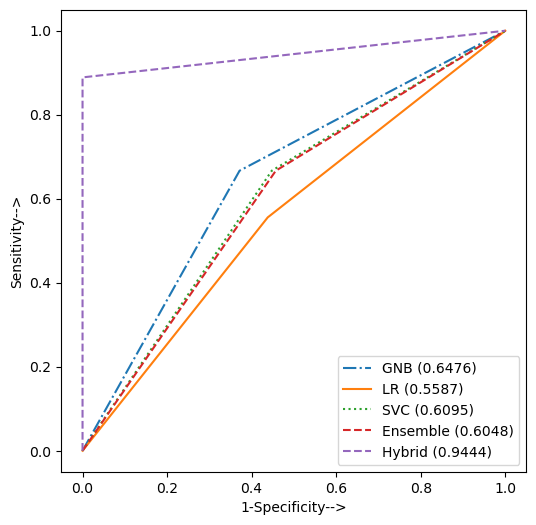

In [21]:
#Receiver Operating Characteristic(ROC) Curve
from sklearn.metrics import roc_curve, auc

# Make sure all arrays have the same shape
y_test = y_test[:114]
y_pred_lr = y_pred_lr[:114]
y_test_pred_gnb = y_test_pred_gnb[:114]
y_pred_gbc = y_pred_gbc[:114]
y_pred_svc = y_pred_svc[:114]
y_pred_hybrid = y_pred_hybrid[:114]

l_fpr, l_tpr, _ = roc_curve(y_test, y_pred_lr)
g_fpr, g_tpr, _ = roc_curve(y_test, y_test_pred_gnb)
e_fpr, e_tpr, _ = roc_curve(y_test, y_pred_gbc)
s_fpr, s_tpr, _ = roc_curve(y_test, y_pred_svc)
h_fpr, h_tpr, _ = roc_curve(y_test, y_pred_hybrid)

auc_l = auc(l_fpr, l_tpr)
auc_s = auc(s_fpr, s_tpr)
auc_g = auc(g_fpr, g_tpr)
auc_e = auc(e_fpr, e_tpr)
auc_h = auc(h_fpr, h_tpr)

plt.figure(figsize=(6,6), dpi=100)
plt.plot(g_fpr, g_tpr, linestyle='-.', label='GNB (%.4f)' %auc_g)
plt.plot(l_fpr, l_tpr, linestyle='-', label='LR (%.4f)' %auc_l)
plt.plot(s_fpr, s_tpr, linestyle=':', label='SVC (%.4f)' %auc_s)
plt.plot(e_fpr, e_tpr, linestyle='--', label='Ensemble (%.4f)' %auc_e)
plt.plot(h_fpr, h_tpr, linestyle='--', label='Hybrid (%.4f)' %auc_h)

plt.xlabel('1-Specificity-->')
plt.ylabel('Sensitivity-->')
plt.legend()

plt.show()
